In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import auctiondates.auctionFileProcessing as afp

%load_ext autoreload
%autoreload 2

AUCTION_FILENAME = r"auctiondates/UST Auction All Data_20230313.csv"
auction_data = afp.loadJPMFullAuctionTable(AUCTION_FILENAME)
twos = afp.pdGetOneAuctionResults(auction_data, 2)
fives = afp.pdGetOneAuctionResults(auction_data, 5)
display(fives)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,bond_series,num_auctions,5Y Tail,5Y BC,5Y Indirect,5Y Direct,5Y Reopening,5Y SOMA,5Y DepInsts,5Y Individuals,5Y Dealers,5Y Pensions,5Y Investments,5Y Foreigns,5Y AuctionSize,5Y AuctionYield
Date,,,,,,,,,,,,,,,,
2018-03-27,[5Y],1.0,0.3,2.50,63.51186,8.29640,1.0,14.97734,0.00000,0.16327,31.36983,0.07143,53.73740,14.45522,35.0,2.612
2018-04-25,[5Y],1.0,0.0,2.49,60.16251,13.67845,1.0,11.31904,0.00000,0.17542,29.82195,0.07143,55.91280,9.54693,35.0,2.837
2018-05-23,[5Y],1.0,0.2,2.52,56.19378,10.86355,1.0,14.80026,0.13889,0.16159,36.15987,0.13889,54.04516,7.89447,36.0,2.864
2018-06-27,[5Y],1.0,0.4,2.55,62.02808,9.49568,1.0,11.07435,0.13889,0.10134,32.35578,0.00000,55.36409,12.01212,36.0,2.719
2018-07-25,[5Y],1.0,-0.9,2.61,67.21612,8.68697,1.0,5.15044,0.00000,0.09361,26.68961,0.00000,64.69931,7.87025,36.0,2.815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-26,[5Y],1.0,-1.7,2.48,67.97763,15.55846,0.0,0.00000,0.00023,0.48514,18.20185,0.00000,68.13889,13.17389,43.0,4.192
2022-11-21,"[2Y, 5Y]",2.0,0.3,2.39,66.22492,18.70724,0.0,9.80554,0.00176,0.31284,16.83299,0.00000,68.10551,10.68178,43.0,3.970
2022-12-28,[5Y],1.0,0.4,2.46,64.51283,18.56467,0.0,0.00000,0.06087,0.45925,18.44228,0.00000,66.02845,14.99775,43.0,3.973


In [88]:
SPREAD_FILENAME = r"transformers/transformer_data_tufv.csv"

tufv = pd.read_csv(SPREAD_FILENAME, index_col=0, parse_dates=[0])
tufv['Spread'] = tufv['close']
tufv_spread = tufv[['Spread']].dropna()
# tufv['Spread'] = tufv['target'].shift(-1)
# tufv_spread = tufv[['Spread']].dropna()
#tufv_spread = tufv_spread['Spread'].resample('D').last()

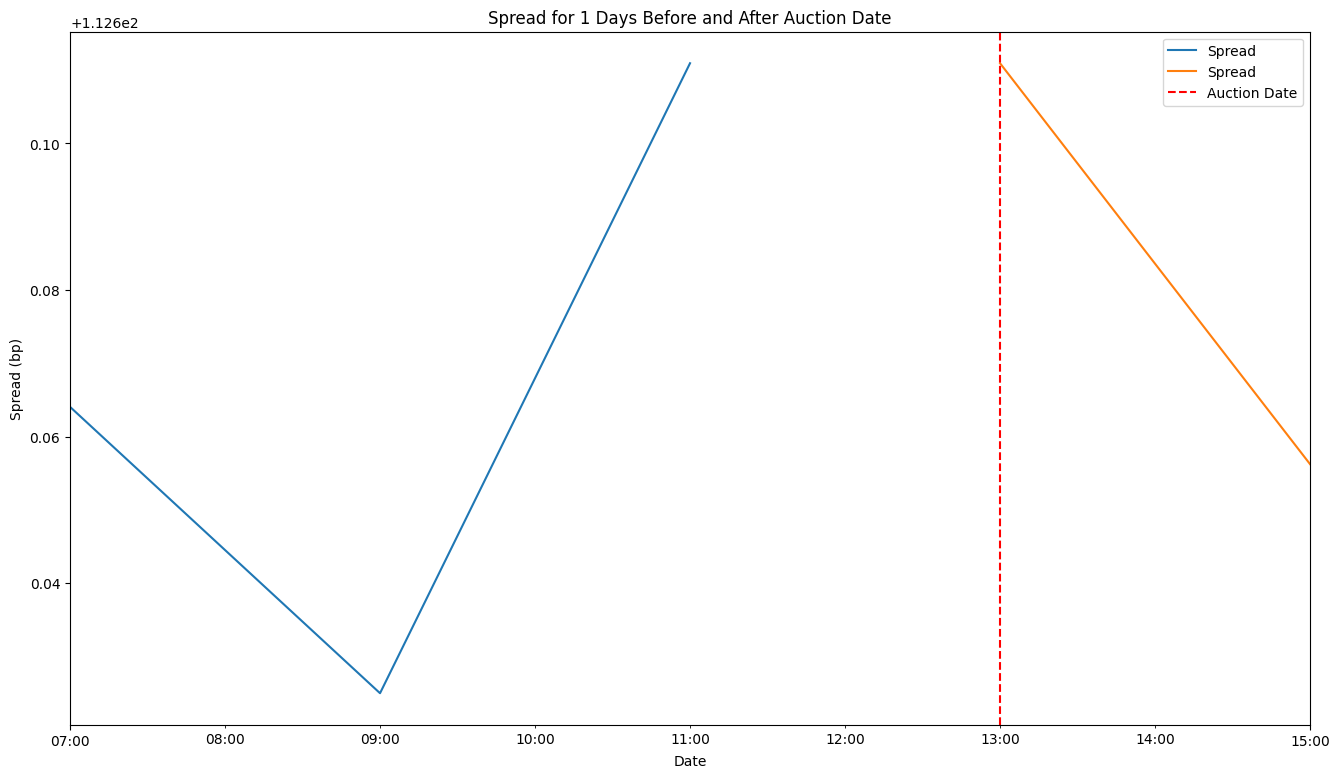

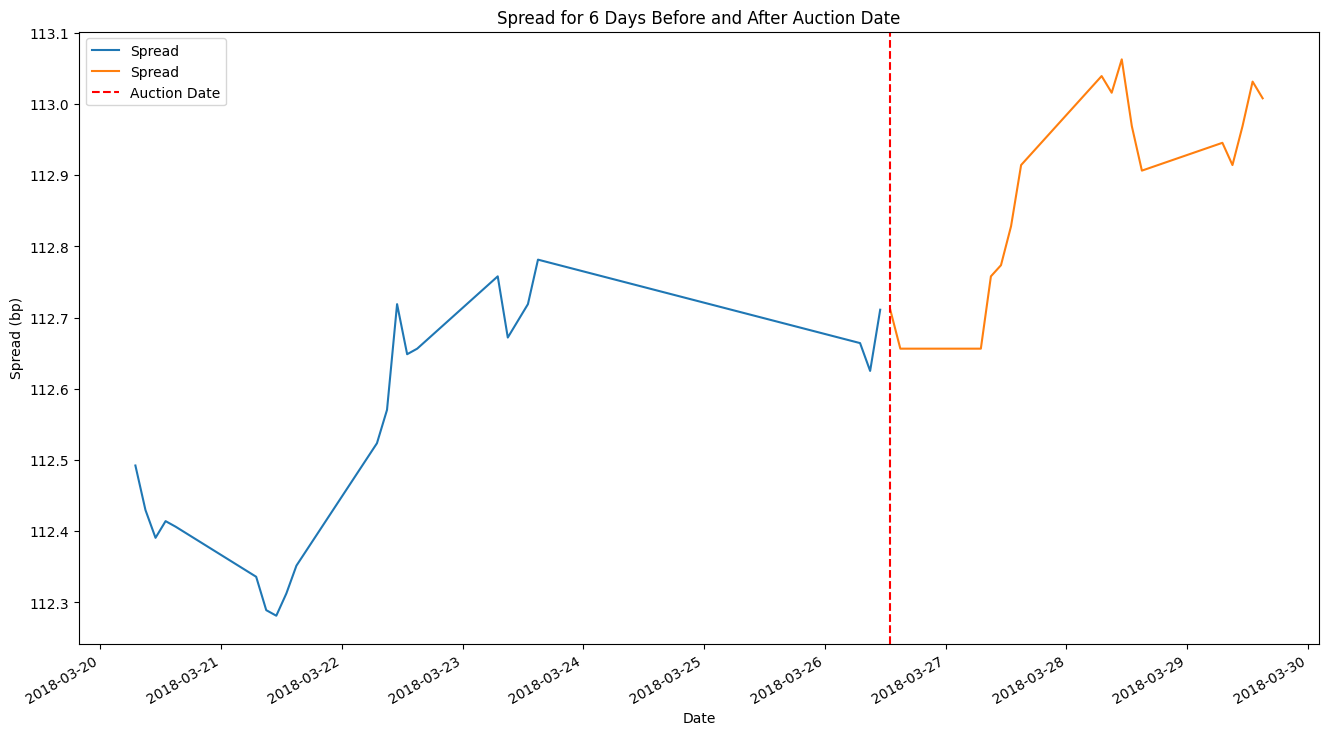

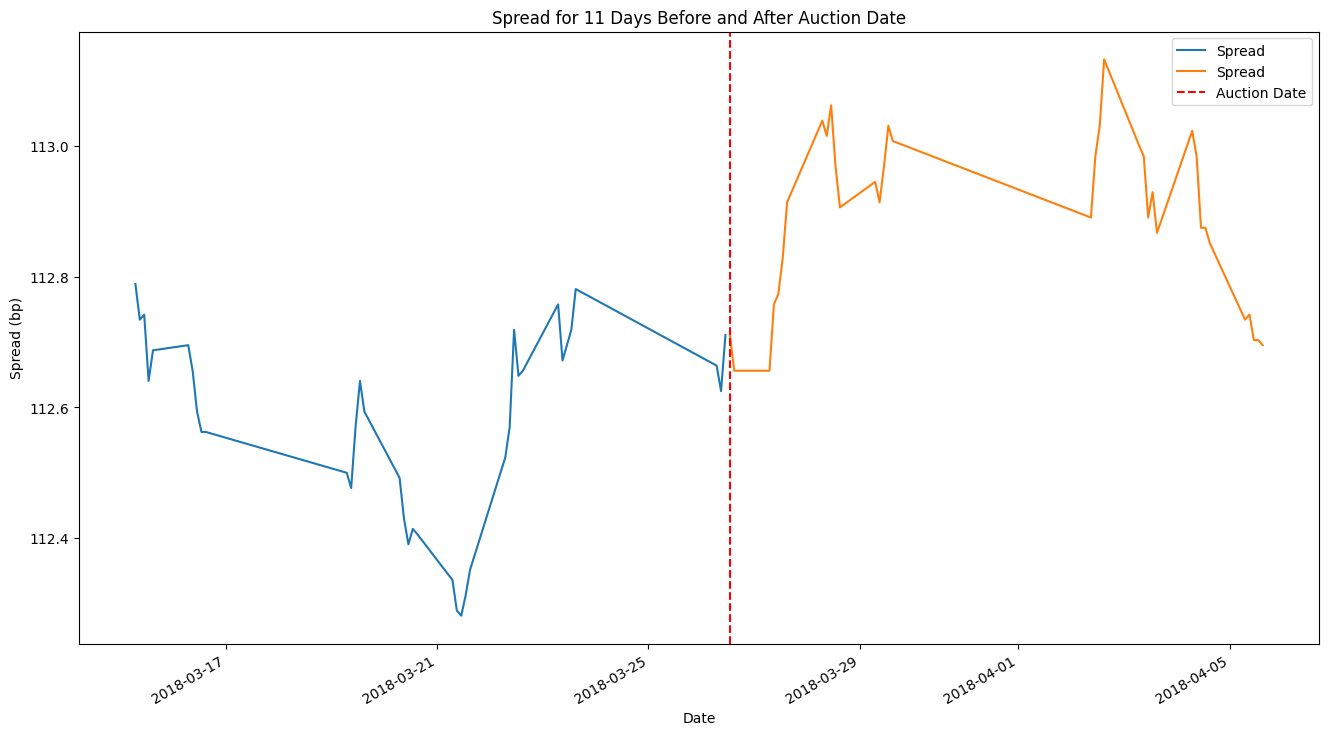

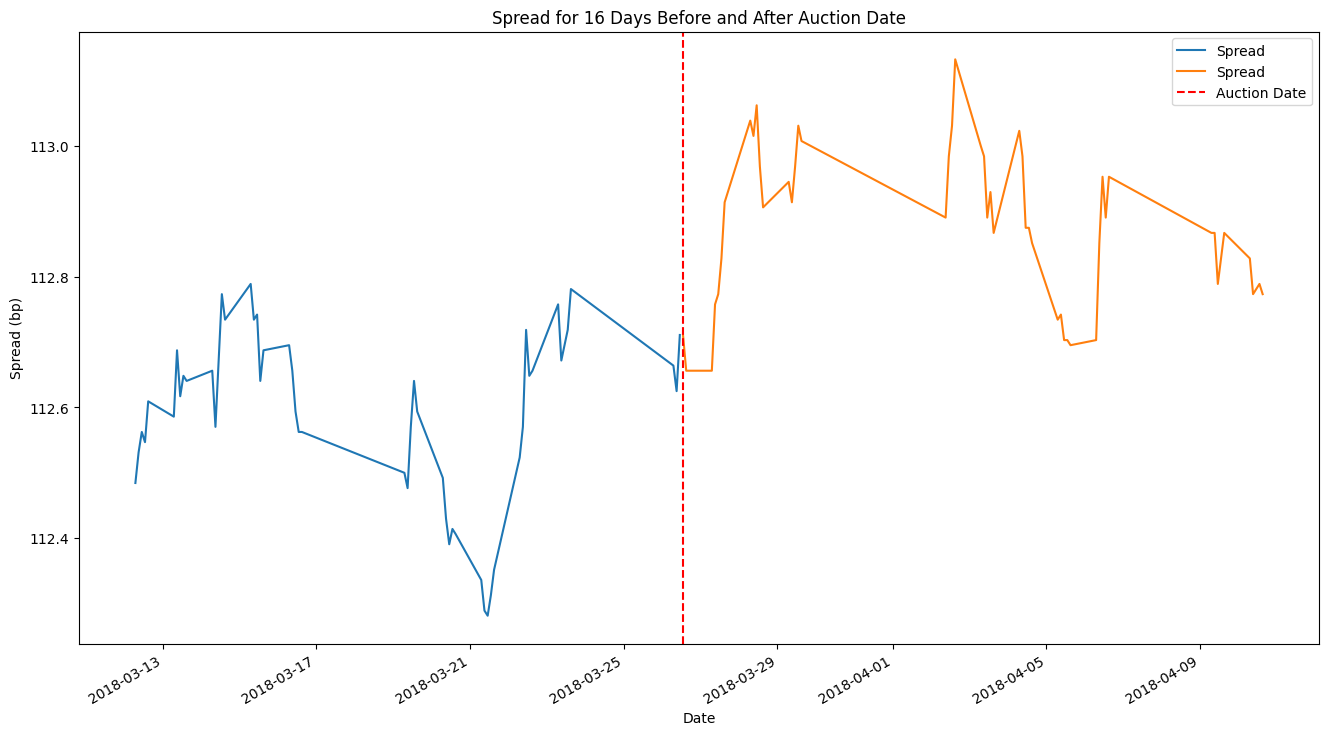

In [99]:
from auction_trading.pnl_calcs import calc_all_trades, plot_single_trade

for i in range(1, 20, 5):
    plot_single_trade(tufv_spread, twos.index[0], i)

In [ ]:
#pnls = calc_all_trades(tufv_spread, twos[:50], 5)
# print(f"PnL on Steepening: ${prior:,.2f}")
# print(f"PnL on Flattening: ${after:,.2f}")

#display(pnls)

# plt.plot(prior)
# plt.plot(after)
# plt.axvline(twos.index[0].replace(hour=13), color='r')
#
# # Rotate xticks 45 degrees
# plt.xticks(rotation=45)
# plt.show()


# fig, ax = plt.subplots(figsize=(12, 8))
#
# fig.patch.set_facecolor('white')
# fig.patch.set_alpha(1)
#
# ax.plot(tufv_spread)
# for i in range(len(twos)):
#     if twos.iloc[i, 0] == ['2Y']:
#         ax.axvline(twos.index[i], color='r')
#     elif twos.iloc[i, 0] == ['2Y', '5Y']:
#         ax.axvline(twos.index[i], color='orange')
#
# # for j in range(len(fives)):
# #     plt.axvline(fives.index[j], color='g')
# for j in range(len(fives)):
#     if fives.iloc[j, 0] == ['5Y']:
#         ax.axvline(fives.index[j], color='g')